# Image Classification

## 패션 MNIST 데이터셋 로드

In [1]:
# tensorflow, keras
import tensorflow as tf
from tensorflow import keras
# helper library
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [2]:
# load dataset
fasion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fasion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# 나중에 이미지를 출력할 때 사용하기 위해 클래스 이름을 변수에 저장
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 탐색

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## 데이터 전처리

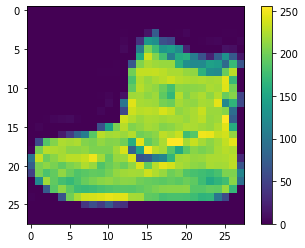

In [10]:
# 첫 번째 train image를 시각화하여 확인
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
# 값의 범위를 0~1로 정규화
train_images = train_images / 255.0
test_images = test_images / 255.0

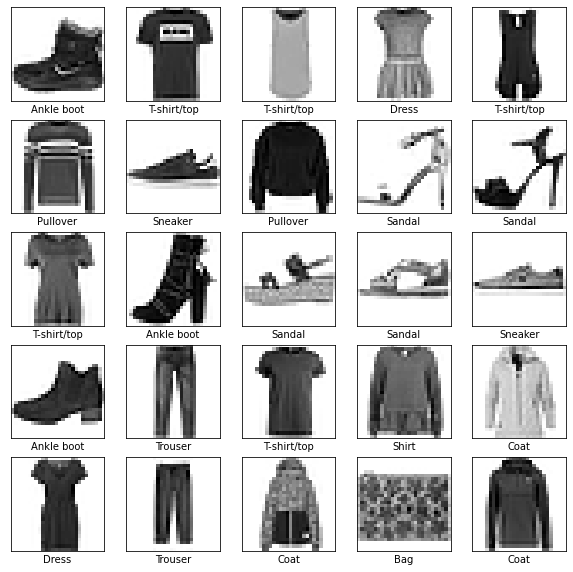

In [15]:
# train image, label 시각화
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 구성

In [51]:
# 레이어 설정
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [53]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 모델 훈련

In [55]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3540 - accuracy: 0.8715
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3258 - accuracy: 0.8807
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3035 - accuracy: 0.8880
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2864 - accuracy: 0.8935
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2748 - accuracy: 0.8978
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2621 - accuracy: 0.9033
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2519 - accuracy: 0.9046
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2428 - accuracy: 0.9098
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2350 - accuracy: 0.9116
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.227

In [56]:
# 정확도 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy: ', test_acc)

313/313 - 0s - loss: 0.3384 - accuracy: 0.8880

Test accuracy:  0.8880000114440918


## 예측

### 예측값 확인

In [58]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [59]:
predictions = probability_model.predict(test_images)

In [60]:
predictions[0] # 첫 번째 test image에 대한 예측값

array([2.5565882e-07, 1.0937623e-10, 4.4846287e-09, 1.8954145e-10,
       6.4884442e-10, 4.5824601e-04, 2.6745722e-08, 2.5578395e-03,
       3.8160715e-09, 9.9698359e-01], dtype=float32)

In [61]:
sum(predictions[0]) # 위 예측값은 각 label에 대한 확률분포임(합이 1)

0.9999999649042983

In [62]:
np.argmax(predictions[0]) # 확률이 가장 높은 값의 label

9

In [63]:
test_labels[0] # 실제 label

9

### 예측 결과 시각화

In [64]:
# image, label 시각화 함수
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    # 이미지 출력
    plt.imshow(img, cmap=plt.cm.binary)
    # 예측 레이블 색 설정(맞으면 파란색, 틀리면 빨간색)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    # 예측 레이블, 확률, 실제 레이블 출력
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)

# 예측값 시각화 함수
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    # 막대 그래프로 예측값 시각화
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    # 막대 색 설정(맞으면 파란색, 틀리면 빨간색)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

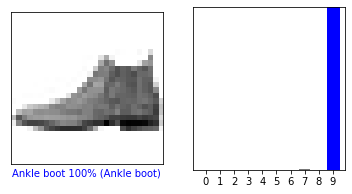

In [65]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

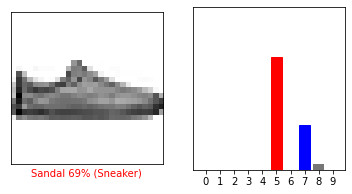

In [66]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

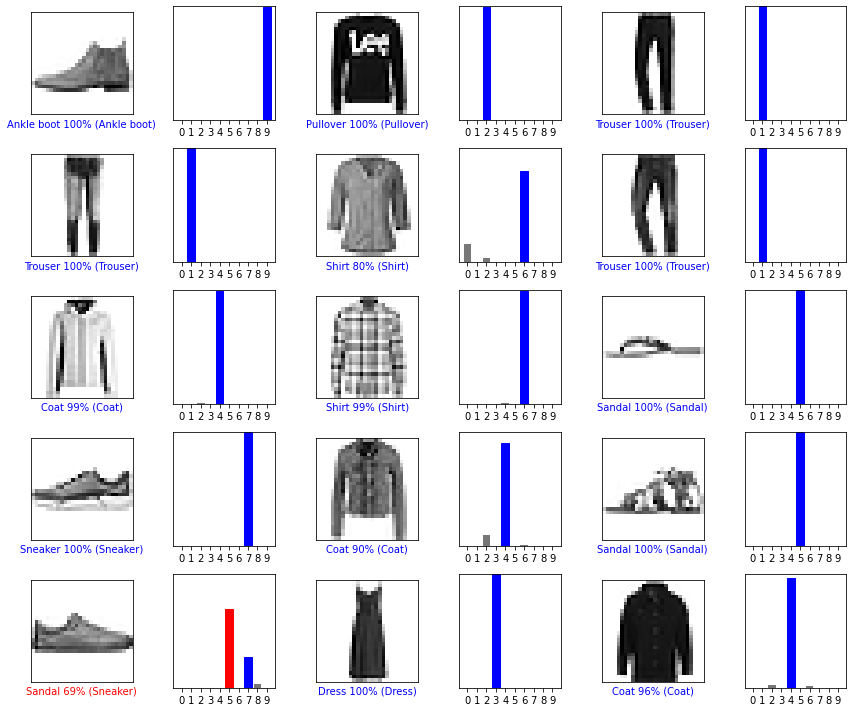

In [67]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### 훈련된 모델 사용

In [71]:
# 테스트 이미지 하나 선택
img = test_images[1]
print(img.shape)

(28, 28)


In [72]:
# 이미지를 배치로 만들기
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [73]:
# 훈련된 모델에 이미지를 넣고 예측
predictions_single = probability_model.predict(img)
print(predictions_single)

[[2.4266339e-04 2.4646577e-13 9.9683505e-01 1.2147228e-10 2.8896125e-03
  9.5985763e-13 3.2666216e-05 2.1688787e-18 1.2387426e-10 6.7608980e-15]]


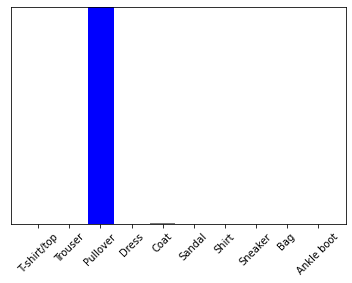

In [75]:
# 예측값 시각화
plot_value_array(1, predictions_single[0], test_labels)
_ =plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [76]:
# 예측된 label
np.argmax(predictions_single[0])

2